In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
schools = pd.read_csv('chicago_schools.csv')
crime = pd.read_csv('crimes.csv')

# Data Cleaning

#### Chicago crime dataset cleaning

In [4]:
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,Ward,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,8427459,HV105780,12/31/2011 11:59:00 PM,020XX W BIRCHWOOD AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,2424,49.0,06,1161163.0,1949801.0,2011,42.017942,-87.682288,POINT (-87.682288375 42.017942201)
1,8421382,HV100007,12/31/2011 11:55:00 PM,017XX N CENTRAL AVE,1330,CRIMINAL TRESPASS,TO LAND,BAR OR TAVERN,True,False,2531,29.0,26,1138776.0,1911133.0,2011,41.912271,-87.765612,POINT (-87.765611802 41.912271433)
2,8424391,HV103122,12/31/2011 11:55:00 PM,002XX W 65TH ST,0820,THEFT,$500 AND UNDER,STREET,False,False,722,20.0,06,1175937.0,1861963.0,2011,41.776589,-87.630571,POINT (-87.630571045 41.776589103)
3,8421387,HV100023,12/31/2011 11:50:00 PM,006XX E GRAND AVE,0460,BATTERY,SIMPLE,PARK PROPERTY,True,False,1834,42.0,08B,1180796.0,1904058.0,2011,41.891990,-87.611462,POINT (-87.611461502 41.891990384)
4,8421476,HV100002,12/31/2011 11:50:00 PM,079XX S DR MARTIN LUTHER KING JR DR,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,True,False,624,6.0,15,1180276.0,1852461.0,2011,41.750416,-87.614956,POINT (-87.614955522 41.750416209)


In [5]:
print(crime.columns)


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')


In [6]:
# Filter to 2011 (just to be sure)
crime = crime[crime['Year'] == 2011]

In [7]:
# Drop duplicates
crime = crime.drop_duplicates()

In [8]:
# Check missing values
crime.isnull().sum().sort_values(ascending=False).head(10)

Location                741
Longitude               741
Latitude                741
Y Coordinate            741
X Coordinate            741
Location Description    322
Ward                     14
Beat                      0
Year                      0
FBI Code                  0
dtype: int64

In [39]:
crime_cleaned = crime[['Primary Type', 'Ward', 'Latitude', 'Longitude']].copy()
crime_cleaned = crime_cleaned.dropna(subset=['Ward', 'Latitude', 'Longitude'])
crime_cleaned = crime_cleaned.rename(columns={'Primary Type': 'Crime_Type'})

In [10]:
crime_cleaned.isnull().sum().sort_values(ascending=False).head(10)

Crime_Type    0
Ward          0
Latitude      0
Longitude     0
dtype: int64

#### Chicago school dataset cleaning

In [11]:
schools.head()

,School ID,Name of School,"Elementary, Middle, or High School",Street Address,City,State,ZIP Code,Phone Number,Link,Network Manager,...,RCDTS Code,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,Community Area Number,Community Area Name,Ward,Police District,Location
0,610038,Abraham Lincoln Elementary School,ES,615 W Kemper Pl,Chicago,IL,60614,(773) 534-5720,http://schoolreports.cps.edu/SchoolProgressRep...,Fullerton Elementary Network,...,150000000000000,1171699.458,1915829.428,41.924497,-87.644522,7,LINCOLN PARK,43,18,"(41.92449696, -87.64452163)"
1,610281,Adam Clayton Powell Paideia Community Academy ...,ES,7511 S South Shore Dr,Chicago,IL,60649,(773) 535-6650,http://schoolreports.cps.edu/SchoolProgressRep...,Skyway Elementary Network,...,150000000000000,1196129.985,1856209.466,41.760324,-87.556736,43,SOUTH SHORE,7,4,"(41.76032435, -87.55673627)"
2,610185,Adlai E Stevenson Elementary School,ES,8010 S Kostner Ave,Chicago,IL,60652,(773) 535-2280,http://schoolreports.cps.edu/SchoolProgressRep...,Midway Elementary Network,...,150000000000000,1148427.165,1851012.215,41.747111,-87.731702,70,ASHBURN,13,8,"(41.74711093, -87.73170248)"
3,609993,Agustin Lara Elementary Academy,ES,4619 S Wolcott Ave,Chicago,IL,60609,(773) 535-4389,http://schoolreports.cps.edu/SchoolProgressRep...,Pershing Elementary Network,...,150000000000000,1164504.290,1873959.199,41.809757,-87.672145,61,NEW CITY,20,9,"(41.8097569, -87.6721446)"
4,610513,Air Force Academy High School,HS,3630 S Wells St,Chicago,IL,60609,(773) 535-1590,http://schoolreports.cps.edu/SchoolProgressRep...,Southwest Side High School Network,...,150000000000000,1175177.622,1880745.126,41.828146,-87.632794,34,ARMOUR SQUARE,11,9,"(41.82814609, -87.63279369)"


In [26]:
print(schools.columns)

Index(['School ID', 'Name of School', 'Elementary, Middle, or High School',
       'Street Address', 'City', 'State', 'ZIP Code', 'Phone Number', 'Link ',
       'Network Manager', 'Collaborative Name',
       'Adequate Yearly Progress Made? ', 'Track Schedule',
       'CPS Performance Policy Status', 'CPS Performance Policy Level',
       'Healthy Schools Certified?', 'Safety Icon ', 'Safety Score',
       'Family Involvement Icon', 'Family Involvement Score',
       'Environment Icon ', 'Environment Score', 'Instruction Icon ',
       'Instruction Score', 'Leaders Icon ', 'Leaders Score ',
       'Teachers Icon ', 'Teachers Score', 'Parent Engagement Icon ',
       'Parent Engagement Score', 'Parent Environment Icon',
       'Parent Environment Score', 'Average Student Attendance',
       'Rate of Misconducts (per 100 students) ', 'Average Teacher Attendance',
       'Individualized Education Program Compliance Rate ', 'Pk-2 Literacy %',
       'Pk-2 Math %', 'Gr3-5 Grade Level Math 

In [27]:
schools_cleaned = schools[[
    'School ID', 'Name of School', 'Elementary, Middle, or High School',
    'Safety Score', 'Average Student Attendance',
    'ISAT Exceeding Reading % ', 'Community Area Name', 
    'Community Area Number', 'Latitude', 'Longitude', 'Ward'
]]

In [28]:
schools_cleaned.columns = (
    schools_cleaned.columns
    .str.strip()
    .str.replace(' ', '_')
    .str.replace('%', 'Percent')
)


In [29]:
schools_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   School_ID                           566 non-null    int64  
 1   Name_of_School                      566 non-null    object 
 2   Elementary,_Middle,_or_High_School  566 non-null    object 
 3   Safety_Score                        513 non-null    float64
 4   Average_Student_Attendance          565 non-null    object 
 5   ISAT_Exceeding_Reading_Percent      476 non-null    float64
 6   Community_Area_Name                 566 non-null    object 
 7   Community_Area_Number               566 non-null    int64  
 8   Latitude                            566 non-null    float64
 9   Longitude                           566 non-null    float64
 10  Ward                                566 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usa

In [30]:
schools_cleaned.isnull().sum()

School_ID                              0
Name_of_School                         0
Elementary,_Middle,_or_High_School     0
Safety_Score                          53
Average_Student_Attendance             1
ISAT_Exceeding_Reading_Percent        90
Community_Area_Name                    0
Community_Area_Number                  0
Latitude                               0
Longitude                              0
Ward                                   0
dtype: int64

In [31]:
schools_cleaned = schools_cleaned.dropna(subset=['Safety_Score', 'Average_Student_Attendance', 'ISAT_Exceeding_Reading_Percent'])
schools_cleaned.isnull().sum()


School_ID                             0
Name_of_School                        0
Elementary,_Middle,_or_High_School    0
Safety_Score                          0
Average_Student_Attendance            0
ISAT_Exceeding_Reading_Percent        0
Community_Area_Name                   0
Community_Area_Number                 0
Latitude                              0
Longitude                             0
Ward                                  0
dtype: int64

In [32]:
schools_cleaned.isnull().sum()

School_ID                             0
Name_of_School                        0
Elementary,_Middle,_or_High_School    0
Safety_Score                          0
Average_Student_Attendance            0
ISAT_Exceeding_Reading_Percent        0
Community_Area_Name                   0
Community_Area_Number                 0
Latitude                              0
Longitude                             0
Ward                                  0
dtype: int64

# Summary

In [33]:
print("Crime dataset shape:", crime_cleaned.shape)
print("School dataset shape:", schools_cleaned.shape)

crime_cleaned['Crime_Type'].value_counts().head(10)
schools_cleaned.describe()

Crime dataset shape: (351290, 4)
School dataset shape: (436, 11)


,School_ID,Safety_Score,ISAT_Exceeding_Reading_Percent,Community_Area_Number,Latitude,Longitude,Ward
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,610068.188073,49.676606,15.515826,38.417431,41.839862,-87.676238,22.211009
std,180.800357,20.183492,14.917397,21.840278,0.091363,0.058723,13.579615
min,609725.000000,1.000000,0.000000,1.000000,41.653674,-87.841052,1.000000
25%,609918.750000,35.000000,6.075000,23.000000,41.767151,-87.715688,10.000000
50%,610067.500000,48.000000,10.900000,34.500000,41.844206,-87.673563,21.000000
75%,610200.250000,62.000000,19.525000,60.000000,41.912988,-87.637524,33.000000
max,610544.000000,99.000000,93.600000,77.000000,42.021064,-87.533007,50.000000


# Integration

For this step, we combined the cleaned school dataset with the cleaned Chicago crime dataset by 'Ward'. 

We aggregated the crime data by Ward to calculate the total number of crimes in each Ward (`Crime_Count`). Then, we merged this aggregated crime data with the school dataset using the Ward column as the key. The result is a dataset where each school has its own attributes (Safety Score, Reading Performance, Attendance, etc.) along with the total number of crimes in the same Ward. This allows us to explore potential relationships between school performance/safety and local crime rates.


In [34]:
crime_by_ward = crime_cleaned.groupby('Ward').size().reset_index(name='Crime_Count')
merged = pd.merge(schools_cleaned, crime_by_ward, on='Ward', how='inner')


In [35]:
merged.head()


,School_ID,Name_of_School,"Elementary,_Middle,_or_High_School",Safety_Score,Average_Student_Attendance,ISAT_Exceeding_Reading_Percent,Community_Area_Name,Community_Area_Number,Latitude,Longitude,Ward,Crime_Count
0,610038,Abraham Lincoln Elementary School,ES,99.0,96.0%,64.4,LINCOLN PARK,7,41.924497,-87.644522,43,4437
1,609926,Franklin Elementary Fine Arts Center,ES,87.0,95.9%,50.2,NEAR NORTH SIDE,8,41.906573,-87.635514,43,4437
2,610033,LaSalle Elementary Language Academy,ES,99.0,96.8%,49.5,LINCOLN PARK,7,41.913882,-87.637601,43,4437
3,610250,Rueben Salazar Elementary Bilingual Center,ES,64.0,95.1%,15.5,NEAR NORTH SIDE,8,41.901444,-87.633739,43,4437
4,610095,Walter L Newberry Math & Science Academy Eleme...,ES,71.0,95.1%,35.9,LINCOLN PARK,7,41.913974,-87.646015,43,4437


In [36]:
#basic summary statistics
print(merged[['Safety_Score', 'ISAT_Exceeding_Reading_Percent', 'Crime_Count']].corr())

                                Safety_Score  ISAT_Exceeding_Reading_Percent  \
Safety_Score                        1.000000                        0.725654   
ISAT_Exceeding_Reading_Percent      0.725654                        1.000000   
Crime_Count                        -0.434973                       -0.312603   

                                Crime_Count  
Safety_Score                      -0.434973  
ISAT_Exceeding_Reading_Percent    -0.312603  
Crime_Count                        1.000000  


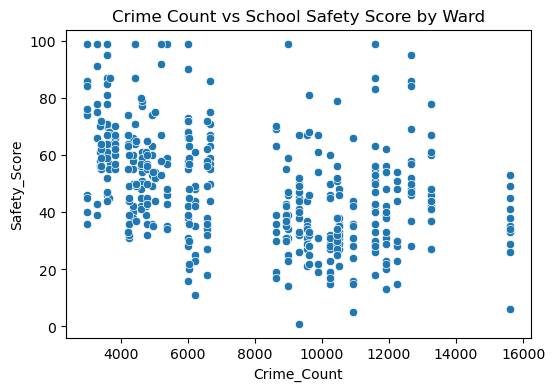

In [37]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=merged, x='Crime_Count', y='Safety_Score')
plt.title("Crime Count vs School Safety Score by Ward")
plt.show()

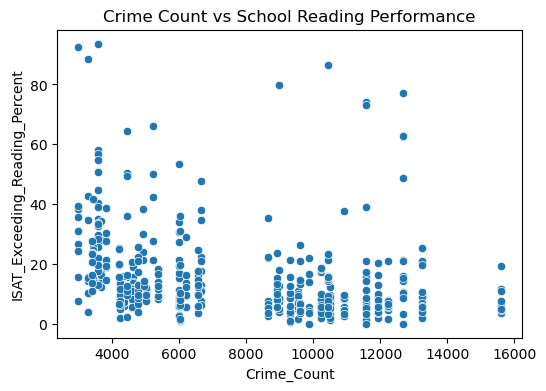

In [38]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=merged, x='Crime_Count', y='ISAT_Exceeding_Reading_Percent')
plt.title("Crime Count vs School Reading Performance")
plt.show()